In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Сравнить рейтинги Fandango и другие пользовательские рейтинги

In [2]:
def getYear(title):
    res = title.split('(')[-1].replace(')', '')
    return res

In [3]:
# Загрузить данные в DataFrame из csv-файла
fan_df = pd.read_csv('fandango_scrape.csv')
fan_df.head(2)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390


In [4]:
fan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
# Считаем метрики для колонок с числами
fan_df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Посмотрим связь между популярностью фильма и его рейтингом**

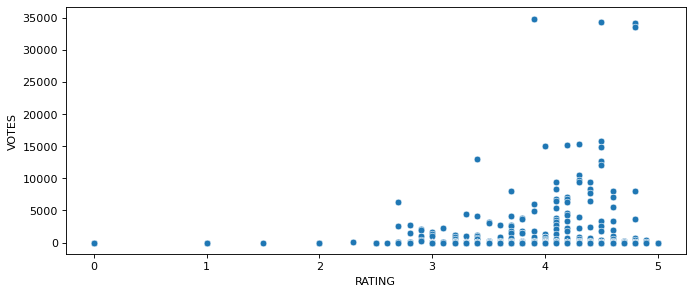

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=80)
# Строим график рассеяния (между двумя переменными)
sns.scatterplot(data=fan_df, x='RATING', y='VOTES');

In [7]:
# Вычислить попарную коррелляцию между всеми числовыми колонками в DataFrame
fan_df.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Предположение, что каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
    
**Из этого создам новую колонку, в ней возьму из строки FILM только год, и назову эту новую колонку YEAR**

In [8]:
# Из колонки 'FILM' получить год выхода фильма
year = fan_df['FILM'].apply(getYear)

In [9]:
# Добавить в DataFrame новую колонку с годом выхода фильма
fan_df['YEAR'] = year
#fan_df.head(2)
fan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
 4   YEAR    504 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.8+ KB


**Сколько фильмов содержится в наборе данных Fandango, в разбивке по годам**

In [10]:
# Посчитать количество фильмов по годам
fan_df['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

**Посмотреть количество фильмов в год с помощью графика:**

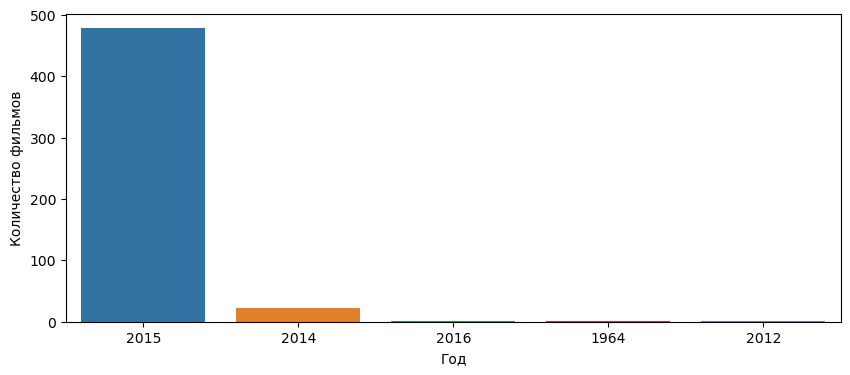

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график: количество строк по категориям (годам) в колонке 'YEAR'
sns.countplot(data=fan_df, x='YEAR')
plt.xlabel('Год')
plt.ylabel('Количество фильмов');

**Какие 10 фильмов получили наибольшее количество голосов (votes)?**

In [12]:
# Найти 10 фильмов с наибольшим количеством голосов
fan_df.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [13]:
# Найти число фильмов с количеством голосов = 0
no_votes = fan_df['VOTES'] == 0
no_votes.sum()  # True = 1; False = 0

69

**Создаем DataFrame только с теми фильмами, которые имеют голоса (votes) - то есть, удаляем те фильмы, у которых нет ни одного голоса.**

In [14]:
# Удалить из DataFrame строки с количеством голосов = 0
mask = fan_df['VOTES'] > 0
reviewed_fan_df = fan_df[mask]
#reviewed_fan_df

----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Попробуем визуализировать эту разницу распределений.**

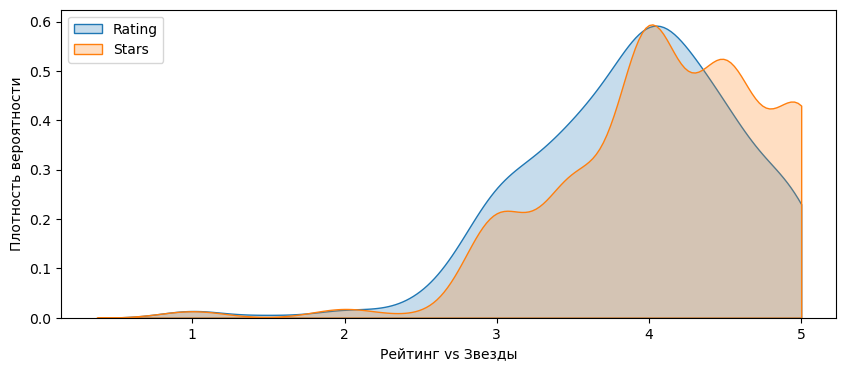

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# 2 графика на одной координатной оси
# Строим ПЕРВЫЙ график плотности распределения вероятности 
sns.kdeplot(
    data=reviewed_fan_df,
    x='RATING',
    # Ограничить диапозон
    clip=[0, 5],
    #
    fill=True,
    #
    label='Rating'
)

# Строим ВТОРОЙ график плотности распределения вероятности 
sns.kdeplot(
    data=reviewed_fan_df,
    x='STARS',
    # Ограничить диапозон
    clip=[0, 5],
    #
    fill=True,
    #
    label='Stars'
)

plt.xlabel('Рейтинг vs Звезды')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper left');

**Посчитаем эту разницу в численном виде; Создадим новую колонку, в которой сохраниме разницу между колонками STARS и RATING с помощью обычного вычитания STARS-RATING.**

In [16]:
# Найти разницу между колонками 'STARS' и 'RATING'
stars_diff = reviewed_fan_df['STARS'] - reviewed_fan_df['RATING']
# Добавить в DataFrame новую колонку
reviewed_fan_df['STARS_DIFF'] = stars_diff
# Округлить до 1 знака после запятой
reviewed_fan_df['STARS_DIFF'] = reviewed_fan_df['STARS_DIFF'].round(1)
reviewed_fan_df.head(2)

C:\Users\petrashko\AppData\Local\Temp\ipykernel_9028\1746338023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_fan_df['STARS_DIFF'] = stars_diff
C:\Users\petrashko\AppData\Local\Temp\ipykernel_9028\1746338023.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_fan_df['STARS_DIFF'] = reviewed_fan_df['STARS_DIFF'].round(1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0


**Строим график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

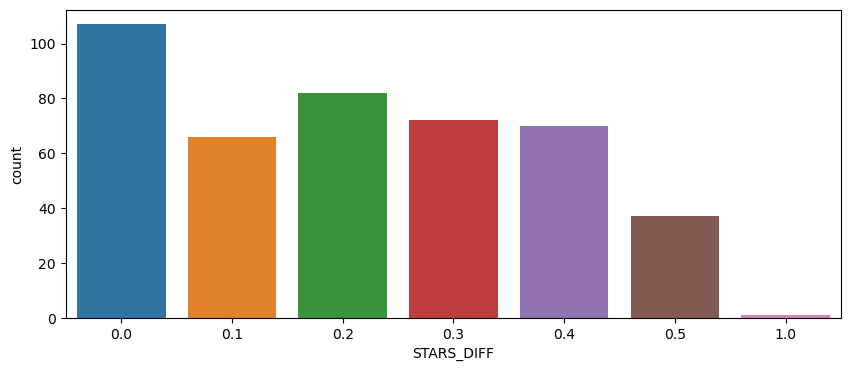

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график: количество строк по категориям в колонке 'STARS_DIFF'
sns.countplot(data=reviewed_fan_df, x='STARS_DIFF');

**На этом графике видно, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом! Найдем этот фильм.**

In [18]:
mask = reviewed_fan_df['STARS_DIFF'] == 1
reviewed_fan_df[mask]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0
